In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns

In [24]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

In [25]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
bos=pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
bos.shape

(506, 13)

In [28]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
bos.columns=boston.feature_names

In [30]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [32]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [33]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
bos["Price"]=boston.target

In [35]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


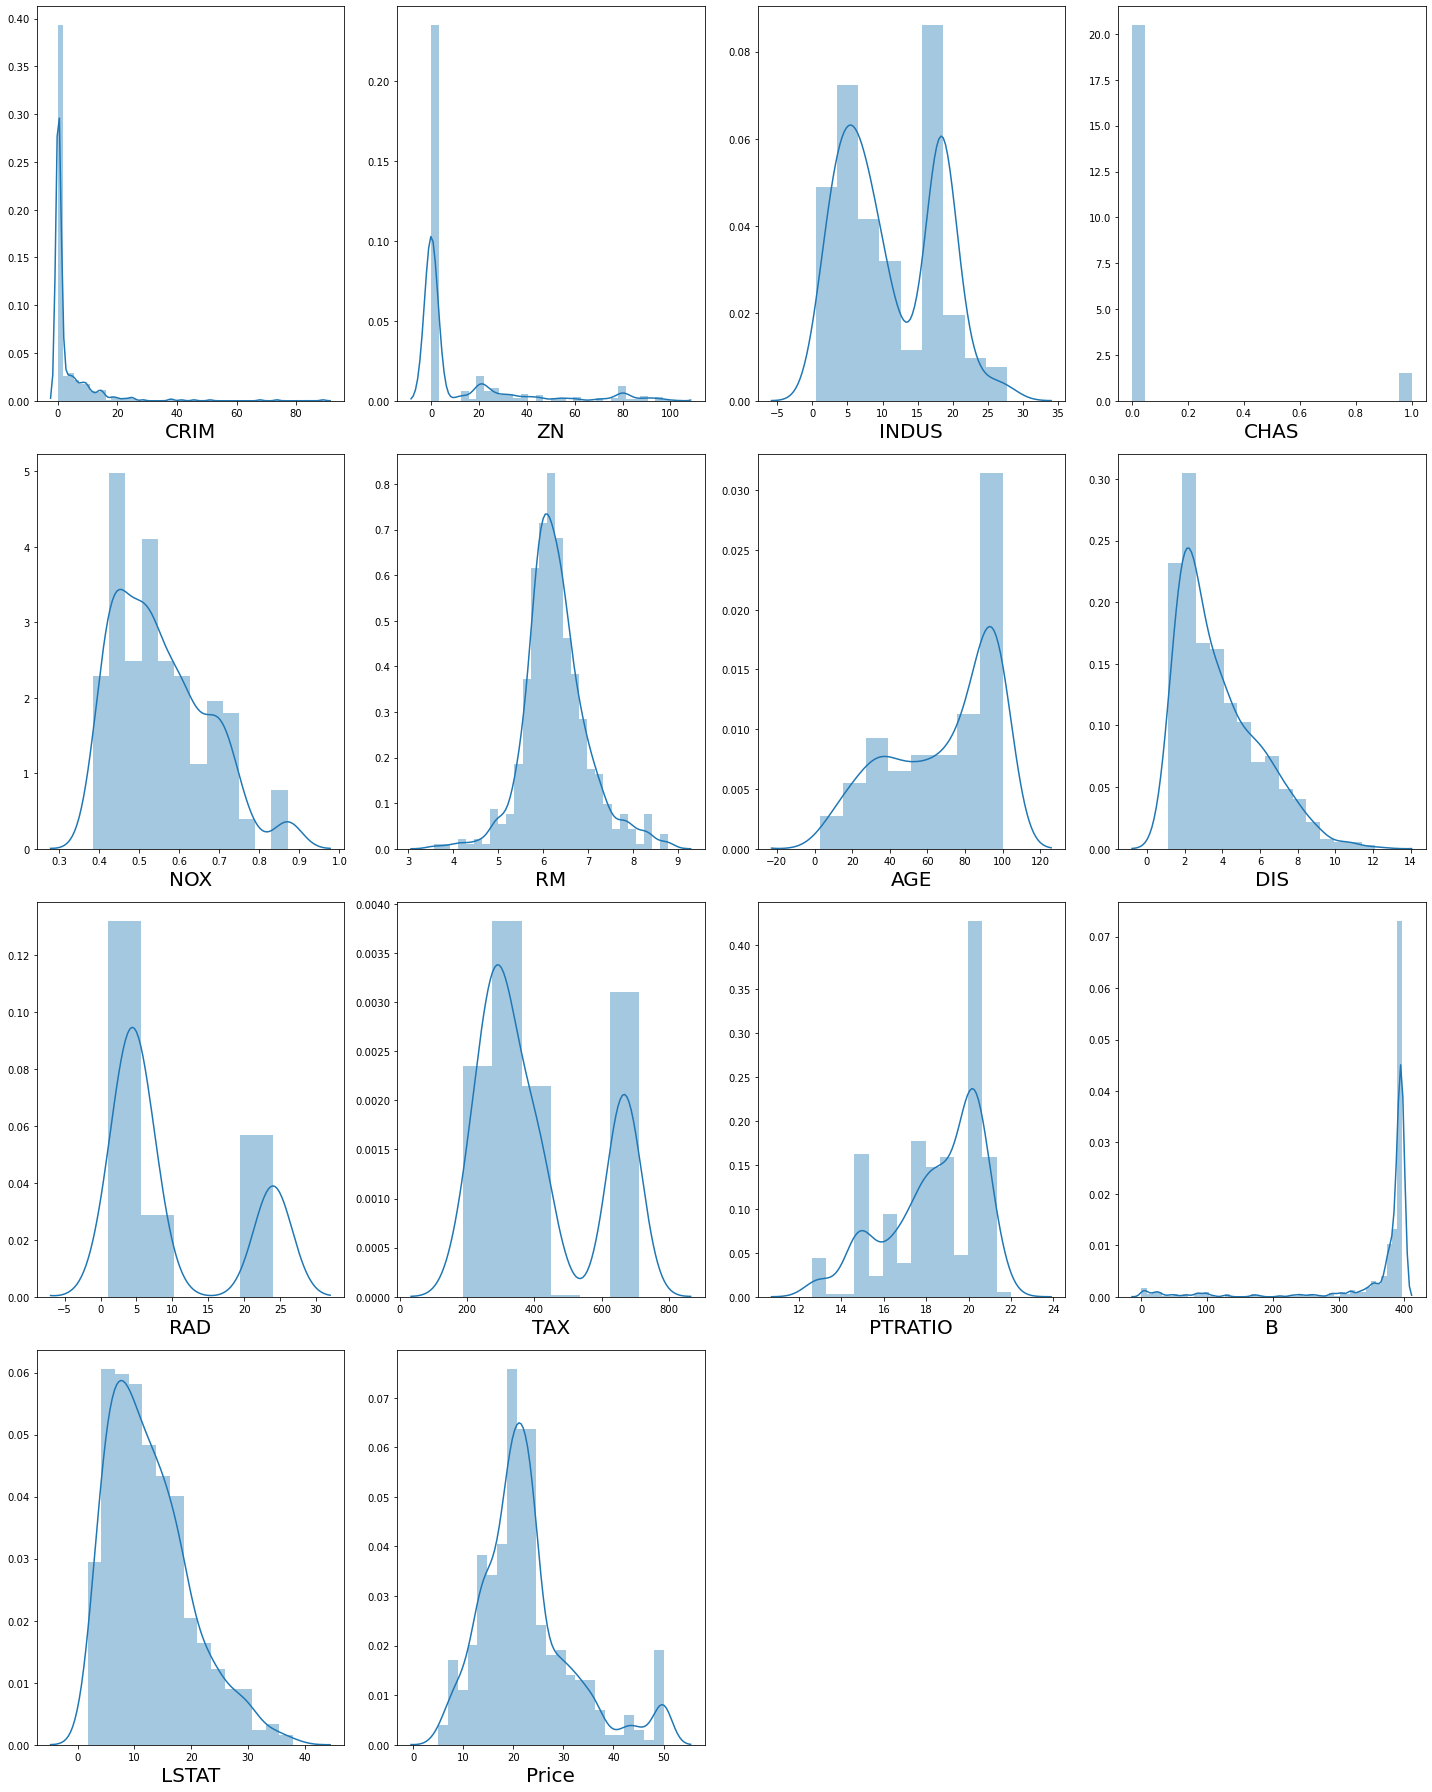

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [95]:
x=bos.drop(columns=["Price"],axis=1)
y=bos["Price"]

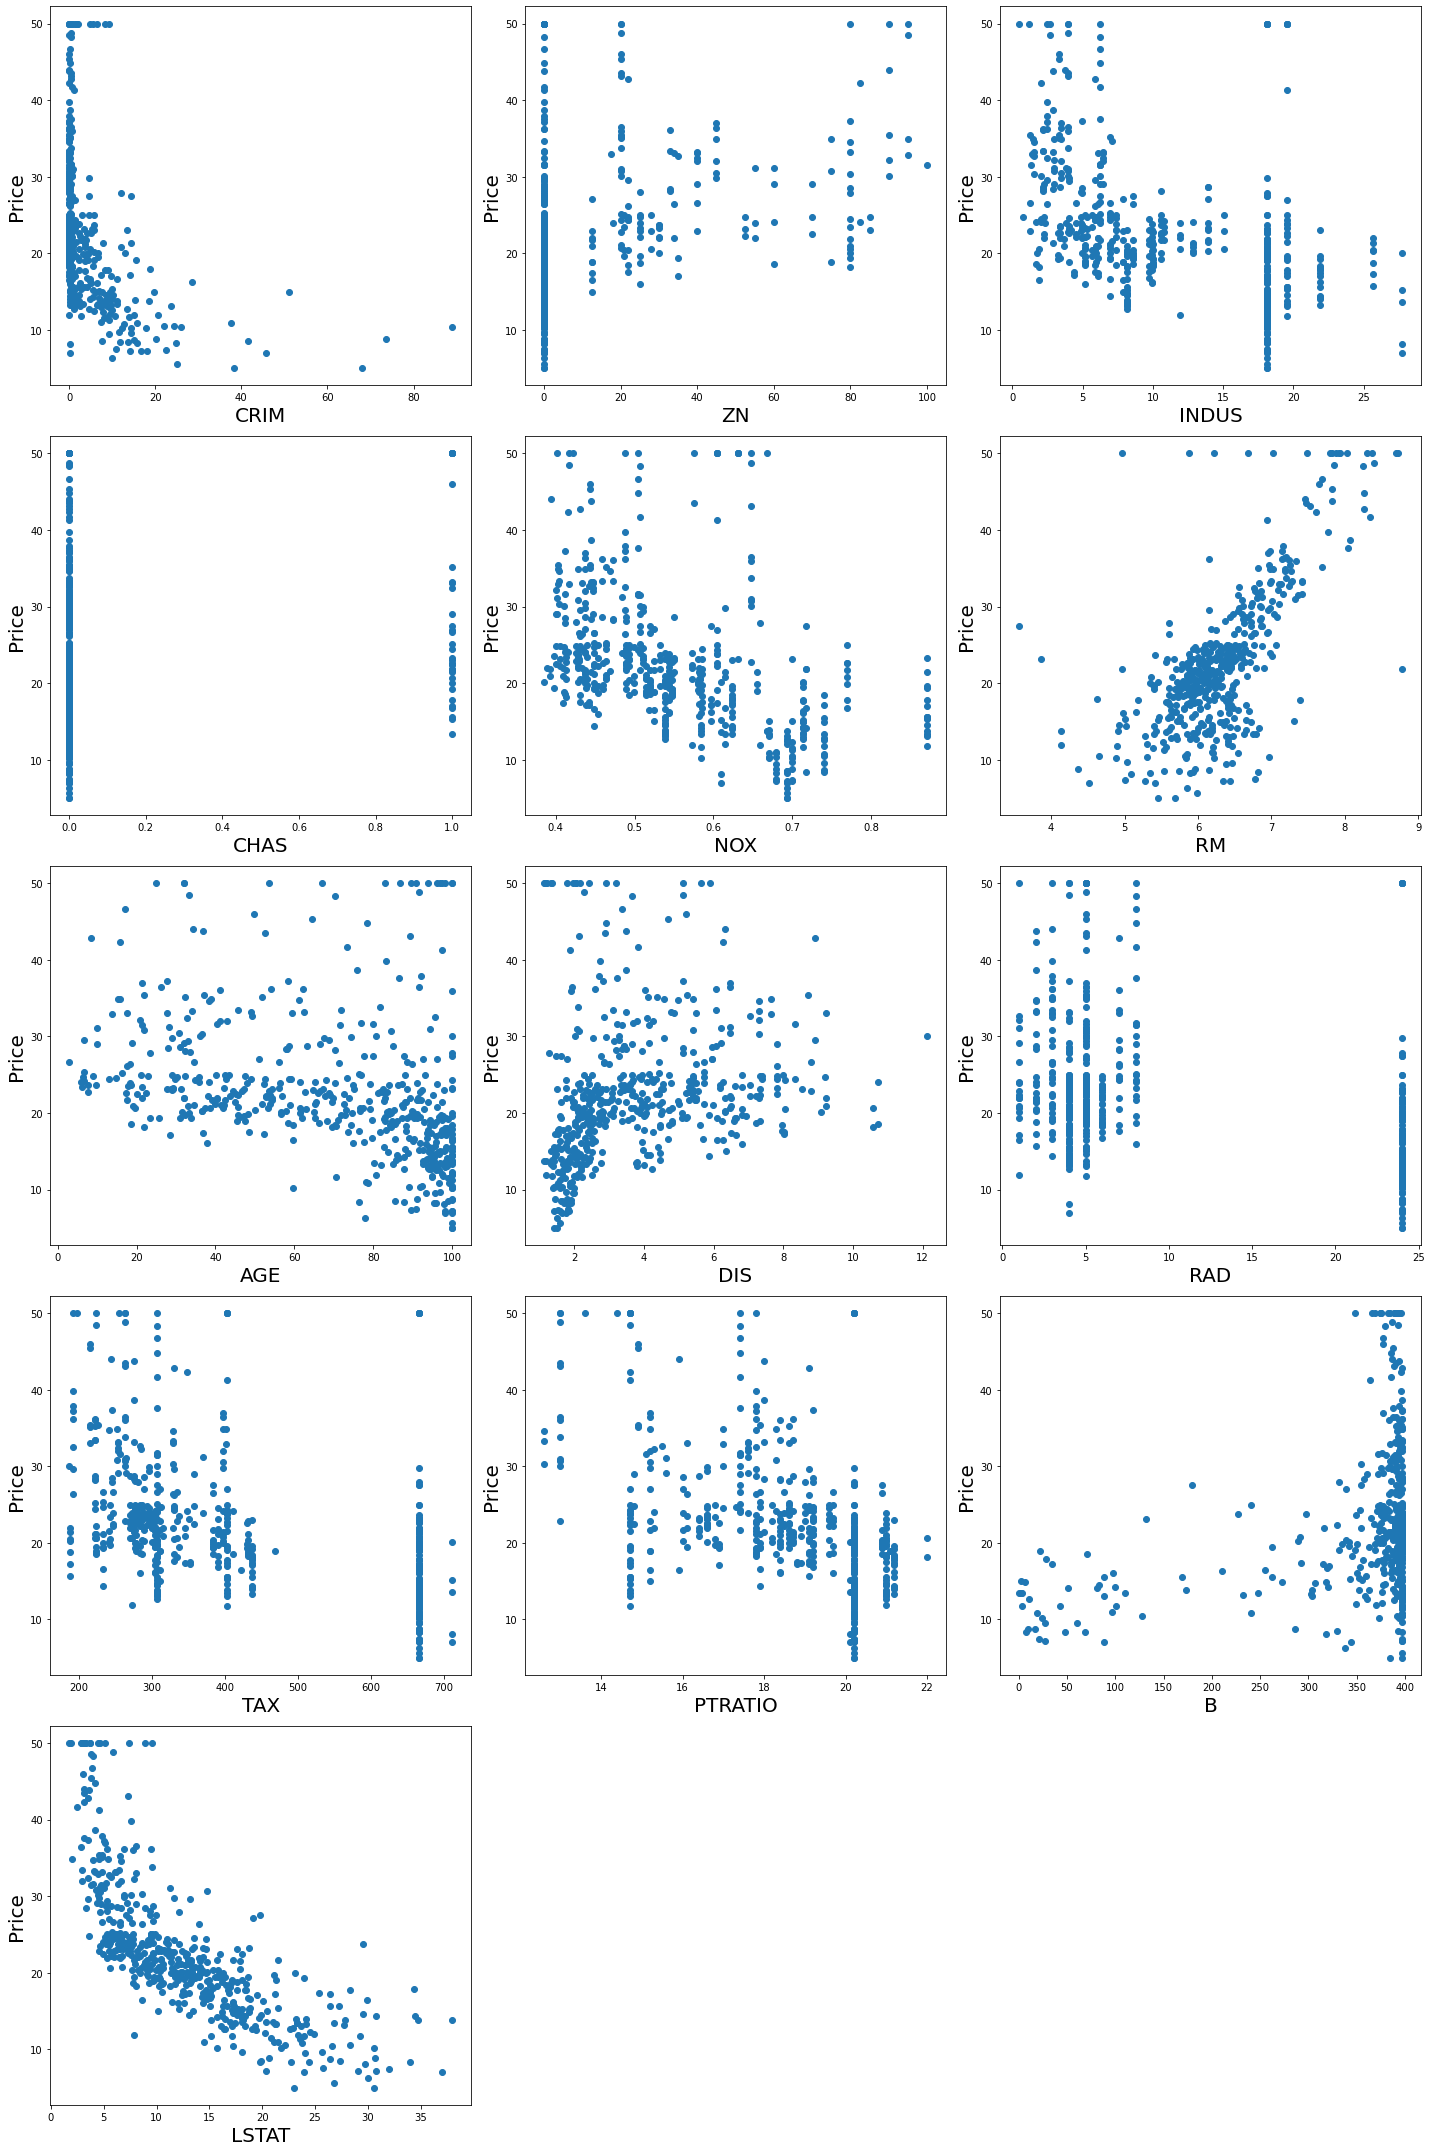

In [39]:
#Scatter Plot Of Each Column

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


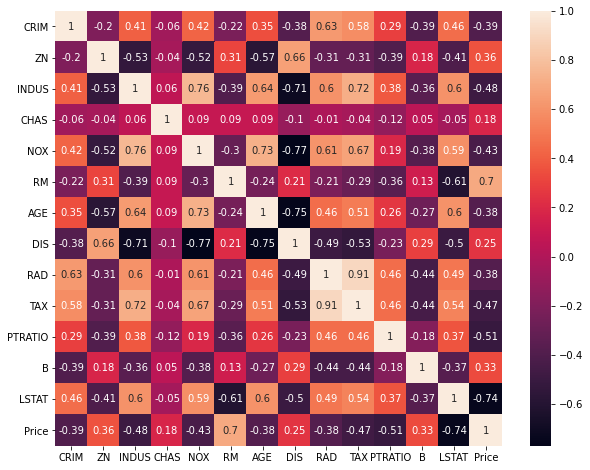

In [46]:
#Check Corelation between the data for multicolinearity
plt.figure(figsize=(10,8))
corealation_matrix=bos.corr().round(2)
sns.heatmap(data=corealation_matrix,annot=True)

In [47]:
#Function to filter columns based on Corealtion
def getCorrelFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i in corealation_matrix.columns:
        #print(corrdata[i])
        if abs(corrdata[i])>threshold:
            feature.append(i)
            value.append(corrdata[i])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [48]:
#Taking into Consideration Only Corelated column greater than threshols
threshold=0.5
corrval=getCorrelFeature(corealation_matrix["Price"],threshold)
corrval

,Corr Value
RM,0.70
PTRATIO,-0.51
LSTAT,-0.74
Price,1.00


In [49]:
#Taking into account above selected columns
ImpColumns=corrval.index
correlated_data=bos[ImpColumns]
correlated_data

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


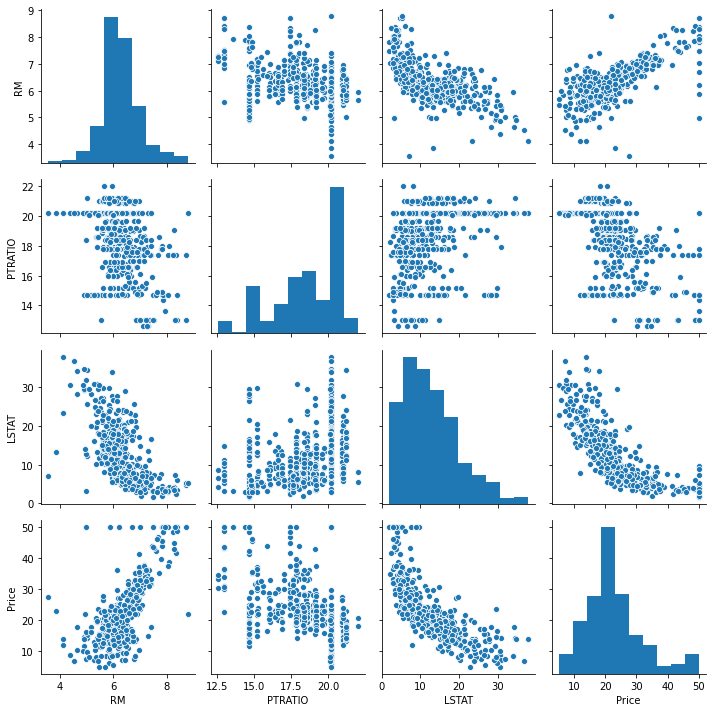

In [50]:
#Checking the relationship whith PairPlot

sns.pairplot(correlated_data)
plt.tight_layout()

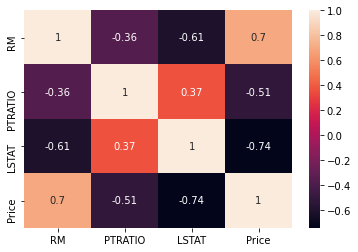

In [51]:
#Check Corelation between the data for multicolinearity after removal of columns
corealation_matrix=correlated_data.corr().round(2)
sns.heatmap(data=corealation_matrix,annot=True)

In [52]:
correlated_data

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [53]:
x=correlated_data.drop(columns=["Price"])
y=correlated_data["Price"]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

,VIF,Features
0,1.653419,RM
1,1.198101,PTRATIO
2,1.679425,LSTAT


We do not any multicolinearity in betweem the data 

In [55]:
x

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [56]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

Modelling part

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

In [58]:
x_train.shape

(379, 3)

In [59]:
x_test.shape

(127, 3)

In [60]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [61]:
regression.intercept_

15.034844312552679

In [62]:
regression.coef_

array([ 4.9424626 , -0.92599678, -0.50573801])

In [63]:
regression.score(x_train,y_train)

0.6684459930463065

In [64]:
from sklearn.metrics import r2_score
score=r2_score(regression.predict(x_test),y_test)
score

0.49312080972876715

In [65]:
prdiction=regression.predict(x_test)

In [66]:
y_test

488    15.2
128    18.0
191    30.5
53     23.4
388    10.2
       ... 
368    50.0
145    13.8
198    34.6
405     5.0
179    37.2
Name: Price, Length: 127, dtype: float64

The value of R^2 with the test data is very less now let us try to rebulit the model with all columns

In [67]:
#Trying with all columns in the dataset
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [68]:
x=bos.drop(columns=["Price"])
y=bos["Price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [69]:
regression.score(x_train,y_train)

0.730647531347494

In [70]:
from sklearn.metrics import r2_score
score=r2_score(regression.predict(x_test),y_test)
score

0.6378202448027781

R^2 for test data improved significantly from 49 % to 63 % . Now let us try to check and remove multi colinearity

In [71]:
#Trying to filter out multi colinearity 
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
x=bos.drop(columns=["Price"])
y=bos["Price"]

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

Vif of RAD and TAX is more than 5 hence multicolinearity is present. Now let us check the co- relation using the heat map.

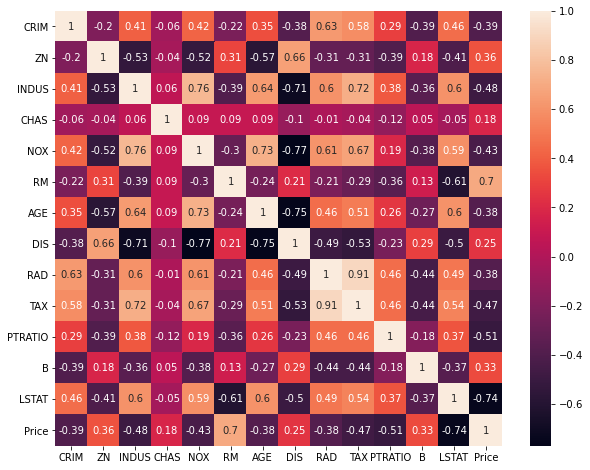

In [74]:
#Check Corelation between the data for multicolinearity
plt.figure(figsize=(10,8))
corealation_matrix=bos.corr().round(2)
sns.heatmap(data=corealation_matrix,annot=True)

Correlation between RAD and TAX  =0.91 is very high hence we can select only one of them 
Correlation is also hight between DIS and ,(AGE,NOX,INDUS)
Let us also check the P value using the OLS method to decide which columns to remove 

In [105]:
#OLS Method with all columns
x=bos.drop(columns=["Price"],axis=1)
y=bos["Price"]

X = sm.add_constant(x)


import statsmodels.api as sm

model= sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        17:31:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.P value of AGE and Indus is more than 0.05. We can remove both of them.

2.Basis of P value, heat cart correlation let us remove TAX between TAX and RAD.

In [108]:
model.rsquared

0.7406426641094095

In [109]:
model.rsquared_adj

0.733789726372463

In [118]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="Price ~ CRIM + ZN + CHAS + NOX +  RM + DIS +  RAD + PTRATIO +B +LSTAT",data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.84e-135
Time:                        17:36:46   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7123      5.103      6.803      0.000      24.687      44.738
CRIM          -0.1048      0.033     -3.164      0.002      -0.170      -0.040
ZN             0.0366      0.013      2.731      0.007       0.010       0.063
CHAS           2.9679      0.861      3.448      0.001       1.277       4.659
NOX          -20.3144      3.472     -5.850      0.000     -27.137     -13.492
RM             3.9771      0.408      9.754      0.000       3.176       4.778
DIS           -1.4294      0.187     -7.647      0.000      -1.797      -1.062
RAD            0.1288      0.041      3.157      0.002       0.049       0.209
PTRATIO       -1.0149      0.129     -7.867      0.000      -1.268      -0.761
B              0.0097      0.003      3.591      0.000       0.004       0.015
LSTAT         -0.5281      0.048    -11.019      0.000      -0.622      -0.434
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.418
Skew:                           1.441   Prob(JB):                    2.40e-149
Kurtosis:                       7.915   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
lm.rsquared

0.734176779117103

In [120]:
model.rsquared_adj

0.733789726372463

In [178]:
#Let us also remove NOX as std error for NOX is high

In [121]:
#Std error of NOX is also very high 

import statsmodels.formula.api as smf
lm=smf.ols(formula="Price ~ CRIM + ZN + CHAS +  RM + DIS +  RAD + PTRATIO +B +LSTAT",data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.10e-129
Time:                        17:38:30   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3064.
Df Residuals:                     496   BIC:                             3106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0136      4.245      4.008      0.000       8.674      25.353
CRIM          -0.0886      0.034     -2.598      0.010      -0.156      -0.022
ZN             0.0414      0.014      2.997      0.003       0.014       0.069
CHAS           2.6519      0.887      2.988      0.003       0.908       4.395
RM             4.2222      0.419     10.078      0.000       3.399       5.045
DIS           -0.8603      0.165     -5.218      0.000      -1.184      -0.536
RAD            0.0368      0.039      0.946      0.345      -0.040       0.113
PTRATIO       -0.8078      0.128     -6.304      0.000      -1.060      -0.556
B              0.0110      0.003      3.973      0.000       0.006       0.017
LSTAT         -0.5901      0.048    -12.222      0.000      -0.685      -0.495
==============================================================================
Omnibus:                      168.906   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.563
Skew:                           1.440   Prob(JB):                    3.78e-159
Kurtosis:                       8.129   Cond. No.                     7.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
lm.rsquared

0.7157959965771707

In [123]:
model.rsquared_adj

0.733789726372463

In [172]:
x=bos.drop(columns=["INDUS","AGE","TAX","Price"],axis=1)
y=bos["Price"]

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [174]:
regression.score(x_train,y_train)

0.7238662761868391

In [175]:
from sklearn.metrics import r2_score
score=r2_score(regression.predict(x_test),y_test)
score

0.6374108118820468

In [180]:
y_pred=regression.predict(x_test)

In [181]:
y_test

488    15.2
128    18.0
191    30.5
53     23.4
388    10.2
       ... 
368    50.0
145    13.8
198    34.6
405     5.0
179    37.2
Name: Price, Length: 127, dtype: float64

In [182]:
y_pred

array([15.68790258, 19.86639551, 31.31989954, 23.24130601,  6.57546142,
       24.15479969, 20.93983767, 19.77627905, 42.81987141, 20.96489051,
       26.22494028, 25.26869427, 25.55058736, 17.619297  , 10.41328991,
       34.19287342, 19.95791741, 18.64206566, 23.58717498, 17.13756387,
       19.57672312, 23.00861085, 32.65707488, 25.07775018, 35.3191317 ,
       24.77934487, 27.37882968, 35.69226735, 22.41786324, 25.95467816,
       21.46391115, 24.31010909, 15.70074705, 20.74947456, 19.14165523,
       24.07059818, 36.34589121, 19.14678816, 30.58332837, 33.3850003 ,
       22.80014139, 14.30782507, 19.73897642, 19.53722549, 19.97399383,
       20.59802149, 29.49230297, 17.49504097, 22.12478949, 18.03529011,
       18.49442688, 19.97663559, 15.24209141, 30.51450678, 45.82962679,
        6.02570176, 40.6609151 , 27.19335364, 16.1002813 , 21.9433461 ,
        9.78709586, 21.98276136, 12.54278261, 23.09771375, 23.87126377,
        9.6683554 , 27.3892245 , 27.04987171, 17.82799832, 23.04

In [183]:
x

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,21.0,393.45,6.48


In [184]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [187]:
#Saving the file in local
import pickle
filename="MyLinerRegResult.pickle"
pickle.dump(regression,open(filename,"wb"))

In [193]:
#Predicting from the saved Model
load_model=pickle.load(open(filename,"rb"))
a=load_model.predict([[0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,15.3,396.90,4.98]])
print("Predicted Val of house with given input is", a[0]) 

Predicted Val of house with given input is 29.919350357657557


In [ ]:
0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,15.3,396.90,4.98